<a href="https://colab.research.google.com/github/statmike/Logistic-Regression/blob/main/03_Data_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The Data: [handwritten digits](https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn import linear_model

### Load Data

In [2]:
from sklearn import datasets
digits = datasets.load_digits()

### Review Data

In [3]:
digits.data[8]

array([ 0.,  0.,  9., 14.,  8.,  1.,  0.,  0.,  0.,  0., 12., 14., 14.,
       12.,  0.,  0.,  0.,  0.,  9., 10.,  0., 15.,  4.,  0.,  0.,  0.,
        3., 16., 12., 14.,  2.,  0.,  0.,  0.,  4., 16., 16.,  2.,  0.,
        0.,  0.,  3., 16.,  8., 10., 13.,  2.,  0.,  0.,  1., 15.,  1.,
        3., 16.,  8.,  0.,  0.,  0., 11., 16., 15., 11.,  1.,  0.])

In [4]:
digits.images[8]

array([[ 0.,  0.,  9., 14.,  8.,  1.,  0.,  0.],
       [ 0.,  0., 12., 14., 14., 12.,  0.,  0.],
       [ 0.,  0.,  9., 10.,  0., 15.,  4.,  0.],
       [ 0.,  0.,  3., 16., 12., 14.,  2.,  0.],
       [ 0.,  0.,  4., 16., 16.,  2.,  0.,  0.],
       [ 0.,  3., 16.,  8., 10., 13.,  2.,  0.],
       [ 0.,  1., 15.,  1.,  3., 16.,  8.,  0.],
       [ 0.,  0., 11., 16., 15., 11.,  1.,  0.]])

In [5]:
digits.target[8]

8

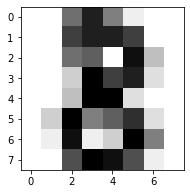

In [8]:
#Display the digit
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[8], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [9]:
print("digits.images.shape:", digits.images.shape) # 1797 images in 8x8 matrix representing pixels and locations
print("digits.data.shape:", digits.data.shape) # 1797 images unstacked into 64 columns ... vector
print("digits.target.shape:", digits.target.shape) # 1797 labels for the images
print("digits.target[:50]:", digits.target[:50]) # print first 50 labels

digits.images.shape: (1797, 8, 8)
digits.data.shape: (1797, 64)
digits.target.shape: (1797,)
digits.target[:50]: [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0
 9 8 9 8 4 1 7 7 3 5 1 0 0]


#### Re-categorize as Odd/Even

In [10]:
digits_df = pd.DataFrame(data=digits.data)
digits_df['target'] = digits.target
digits_df['target_OE'] = digits_df['target'].apply(lambda x : 'Odd' if x%2==1 else ('Even' if x%2==0 else ''))
digits_df['target_OE']

0       Even
1        Odd
2       Even
3        Odd
4       Even
        ... 
1792     Odd
1793    Even
1794    Even
1795     Odd
1796    Even
Name: target_OE, Length: 1797, dtype: object

In [11]:
tab = pd.crosstab(index=digits_df["target_OE"], columns='Percentage')
tabp = (100*tab/tab.sum()).rename_axis(None,axis='rows').rename_axis(None,axis='columns')
display(tabp)

,Percentage
Even,49.582638
Odd,50.417362


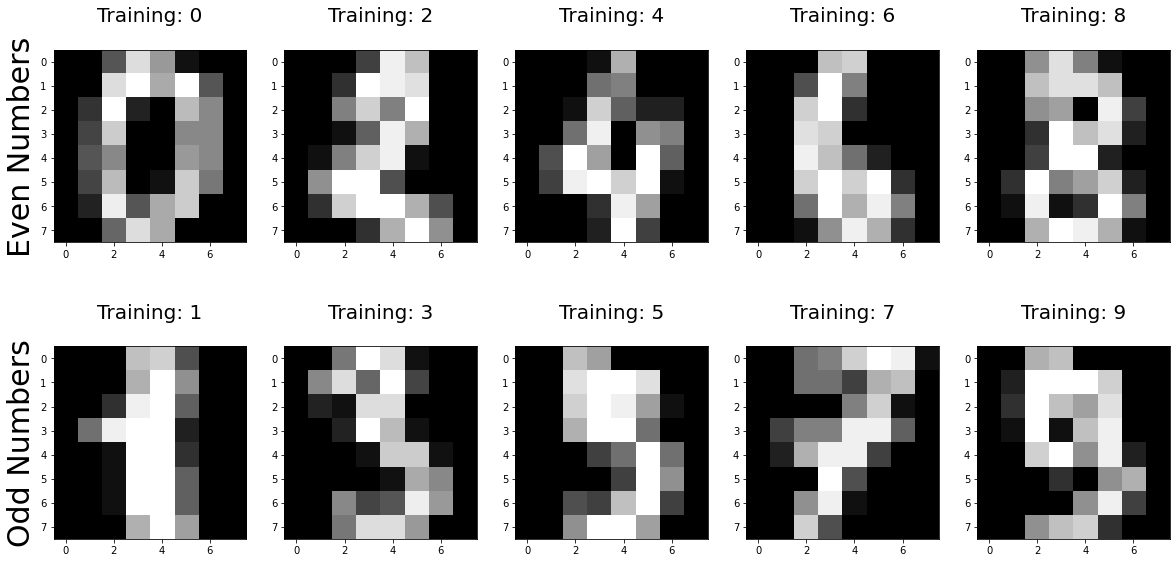

In [12]:
plt.figure(figsize=(20,10))
for row in digits_df.head(10).itertuples():  
  pos = ((row.Index%2)*5)+1 + abs((row.Index%2)-1)*(row.Index/2) + (row.Index%2)*((row.Index-1)/2) # 1/5:even/odd + even_increment + odd_increment 
  plt.subplot(2, 5, pos)
  if pos == 1: plt.ylabel('Even Numbers', fontsize = 30)
  if pos == 6: plt.ylabel('Odd Numbers', fontsize = 30)
  plt.imshow(np.reshape(row[1:65],(8,8)), cmap=plt.cm.gray)
  plt.title('Training: %i\n' % row.target, fontsize = 20) 

### Describe Data

In [13]:
digits_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,10.382304,11.979410,10.279354,8.175849,1.846411,0.107958,0.002782,2.601558,9.903172,6.992766,7.097941,7.806344,1.788536,0.050083,0.001113,2.469672,9.091263,8.821369,9.927101,7.551475,2.317752,0.002226,0.0,2.339455,7.667223,9.071786,10.301614,8.744018,2.909293,0.0,0.008904,1.583751,6.881469,7.228158,7.672231,8.236505,3.456316,0.027268,0.007234,0.704508,7.506956,9.539232,9.416249,8.758486,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,5.421456,3.977543,4.782681,6.052960,3.586321,0.827915,0.062368,3.576301,5.690767,5.802662,6.175729,6.197322,3.259870,0.438597,0.033352,3.146532,6.192038,5.882936,6.152093,5.872556,3.686456,0.047140,0.0,3.480372,6.324687,6.268391,5.933490,5.870648,3.537283,0.0,0.145185,2.981816,6.537955,6.441378,6.259511,5.695527,4.330951,0.307356,0.204223,1.746153,5.644496,5.226948,5.302048,6.031154,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,9.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,4.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,3.000000,6.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,12.000000,13.000000,11.000000,9.000000,0.000000,0.000000,0.000000,1.000000,12.000000,6.000000,6.000000,8.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,12.000000,7.000000,0.000000,0.000000,0.0,0.000000,8.000000,10.000000,13.000000,10.000000,1.000000,0.0,0.000000,0.000000,6.000000,7.000000,8.000000,9.000000,1.000000,0.000000,0.000000,0.000000,8.000000,10.000000,10.000000,10.000000,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,15.000000,16.000000,15.000000,14.000000,2.00000

In [14]:
digits_df.groupby('target_OE').agg(['median'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,target
,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median
target_OE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Even,0.0,0.0,2.0,13.0,12.0,1.0,0.0,0.0,0.0,0.0,11.0,14.0,10.0,4.0,0.0,0.0,0.0,1.0,13.0,8.0,3.0,7.0,0.0,0.0,0.0,2.0,13.0,6.0,7.0,6.0,0.0,0.0,0.0,3.0,12.0,11.0,12.0,8.0,1.0,0.0,0.0,1.0,13.0,10.0,8.0,9.0,2.0,0.0,0.0,0.0,11.0,12.0,11.0,11.0,2.0,0.0,0.0,0.0,3.0,13.0,14.0,8.0,0.0,0.0,4
Odd,0.0,0.0,6.0,13.0,14.0,9.0,0.0,0.0,0.0,0.0,13.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,10.0,5.0,10.0,10.0,0.0,0.0,0.0,0.0,8.0,12.0,14.0,9.0,0.0,0.0,0.0,0.0,3.0,10.0,13.0,11.0,1.0,0.0,0.0,0.0,0.0,1.0,8.0,9.0,0.0,0.0,0.0,0.0,4.0,8.0,9.0,9.0,0.0,0.0,0.0,0.0,7.0,14.0,13.0,4.0,0.0,0.0,5


In [15]:
digits_df.iloc[:,:64].corr(method='pearson')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.000000,0.556618,0.207814,-0.018761,0.060776,0.048388,-0.038927,0.032320,0.556372,0.224522,-0.109056,0.027908,-0.063983,-0.029973,-0.043697,-0.005109,0.213586,-0.113581,-0.105882,0.096254,-0.170070,-0.131330,-0.038266,-0.011183,-0.085911,-0.146383,0.072981,0.041083,-0.206318,-0.150754,-0.015824,NaN,-0.168296,-0.178488,0.044139,-0.059858,-0.235776,-0.173245,NaN,-0.020551,-0.124267,-0.142999,0.024242,-0.054716,-0.163272,-0.086466,-0.025736,-0.011871,0.225775,0.115281,0.020382,0.031455,-0.009579,0.030953,-0.045342,-0.007905,0.855610,0.555727,0.147646,-0.102349,-0.029870,0.026547,-0.043889
2,NaN,0.556618,1.000000,0.560180,-0.084235,0.043569,0.002841,-0.062278,0.022311,0.582259,0.631467,-0.286026,0.028798,0.063248,-0.089221,-0.100526,-0.016943,0.278864,-0.084251,-0.310726,0.208726,-0.086630,-0.217657,-0.118925,-0.036549,-0.153100,-0.310519,0.108378,0.199761,-0.193759,-0.192081,-0.051716,NaN,-0.344061,-0.396431,-0.055715,-0.120387,-0.279790,-0.183321,NaN,-0.067167,-0.268728,-0.341944,-0.157470,-0.203247,-0.189976,-0.069215,-0.064782,-0.038797,0.205796,0.262176,-0.042531,-0.051530,0.082865,0.050849,-0.003804,-0.025837,0.515276,0.937623,0.499840,-0.134754,-0.041183,0.072599,0.082523
3,NaN,0.207814,0.560180,1.000000,0.023938,-0.171377,-0.115732,-0.040139,0.035663,0.328344,0.596480,-0.002440,-0.068626,0.023163,-0.178804,-0.113830,0.022736,0.187811,0.040516,-0.360440,0.067943,-0.018315,-0.224892,-0.149758,-0.002639,-0.109260,-0.256293,-0.057108,0.090178,-0.183257,-0.141774,-0.067672,NaN,-0.227455,-0.224377,0.017606,-0.077963,-0.226493,-0.037223,NaN,-0.099624,-0.257836,-0.102203,-0.025302,-0.243829,-0.214744,0.089703,0.046919,-0.062799,0.015447,0.299762,0.279420,-0.180531,0.022396,0.139397,0.075335,-0.049085,0.175804,0.560326,0.767945,-0.065957,-0.054936,0.053437,0.081971
4,NaN,-0.018761,-0.084235,0.023938,1.000000,0.507731,0.127764,0.010065,0.042065,0.051657,0.013998,-0.135715,0.160268,0.390035,0.133625,0.014505,0.009911,0.036612,-0.124452,-0.155501,-0.029025,0.182671,0.078333,0.023887,0.008971,0.027043,-0.063194,0.036231,0.089654,0.122548,0.078057,0.012694,NaN,-0.028073,-0.015664,0.026593,0.069915,0.089086,0.051408,NaN,0.023642,-0.018364,-0.095154,-0.037575,0.051713,0.074574,-0.090120,-0.039530,0.024149,-0.020577,-0.165601,-0.043649,0.030314,-0.120561,-0.264968,-0.212220,0.017352,-0.047223,-0.020176,-0.008867,-0.082125,-0.215809,-0.250699,-0.215349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,NaN,0.147646,0.499840,0.767945,-0.008867,-0.068038,-0.045845,0.001013,0.043374,0.305191,0.634092,0.048263,-0.160488,0.070522,-0.066877,-0.055078,0.021539,0.227438,0.140376,-0.340018,-0.063242,-0.015588,-0.130255,-0.110856,-0.000680,-0.023912,-0.189589,-0.053577,0.036466,-0.190381,-0.157775,-0.030661,NaN,-0.212700,-0.285389,-0.077857,-0.116610,-0.195100,-0.041756,NaN,-0.078393,-0.232816,-0.163798,-0.166145,-0.197935,-0.129182,0.081903,0.006889,-0.040607,0.036465,0.229069,0.153666,-0.061683,0.065180,0.094718,0.050032,-0.038248,0.112972,0.481711,1.000000,0.058390,-0.094956,0.006849,0.099671
60,NaN,-0.102349,-0.134754,-0.065957,-0.082125,-0.351146,-0.383522,-0.178243,0.048996,-0.000604,-0.077451,0.046670,0.015946,-0.199519,-0.298199,-0.100317,0.021630,0.036393,0.119076,0.207694,0.002642,-0.120517,-0.079916,-0.002784,0.008059,0.029233,0.083202,0.066731,-0.108922,-0.163125,-0.144672,0.001828,NaN,0.020

In [16]:
digits_df.iloc[:,:64].corr(method='pearson').style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:1127: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


In [17]:
digits_df.iloc[:,np.r_[-1,0:8]].groupby('target_OE').corr(method='pearson').style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:1127: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


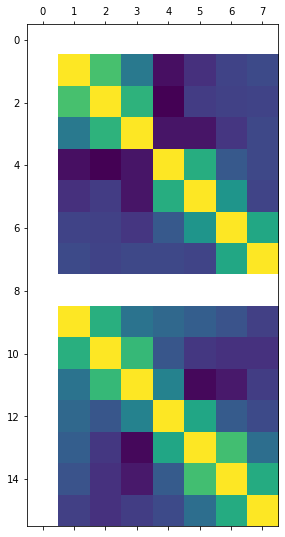

In [18]:
f=plt.figure(figsize=(9,9))
plt.matshow(digits_df.iloc[:,np.r_[-1,0:8]].groupby('target_OE').corr(method='pearson'),fignum=f.number)